<a href="https://colab.research.google.com/github/vitorchaud/calc_num/blob/main/interpola%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Interpolação Polinomial: Uma Visão Geral

A **Interpolação Polinomial** é uma técnica numérica utilizada para construir uma função polinomial que passa por um conjunto de pontos de dados especificados. O objetivo é encontrar um polinômio que "ligue" esses pontos de forma suave, permitindo estimar valores em pontos intermediários ou analisar o comportamento subjacente dos dados.

Existem duas abordagens principais para a interpolação polinomial:

#### Interpolação Global

Na **Interpolação Global**, um único polinômio de alto grau é construído para passar por *todos* os pontos de dados fornecidos. Alguns métodos comuns incluem:

*   **Polinômio de Lagrange:** Constrói um polinômio único que interpola todos os pontos, mas pode ser computacionalmente intensivo para muitos pontos e propenso a oscilações (fenômeno de Runge) em polinômios de alto grau.
*   **Polinômio de Newton:** Uma forma alternativa de expressar o polinômio interpolador, que pode ser mais estável numericamente em alguns casos e permite adicionar novos pontos sem recalcular tudo do zero.

**Características da Interpolação Global:**
*   **Um único polinômio:** Uma única equação descreve toda a curva interpoladora.
*   **Sensibilidade:** Pequenas mudanças em um ponto de dado podem afetar drasticamente a forma de todo o polinômio.
*   **Oscilações:** Para um grande número de pontos, especialmente se espaçados irregularmente, polinômios de alto grau podem exibir oscilações significativas entre os pontos, levando a resultados não físicos ou indesejados.

#### Interpolação Local (Splines)

Em contraste, a **Interpolação Local**, frequentemente realizada através de **Splines**, divide o domínio dos dados em subintervalos e constrói um polinômio de baixo grau (geralmente cúbico) para cada subintervalo. Esses polinômios são então conectados de forma a garantir suavidade (continuidade da função e suas derivadas) nas fronteiras dos subintervalos.

**Tipos comuns de Splines:**
*   **Splines Cúbicos:** Os mais utilizados, onde cada segmento é um polinômio cúbico. Eles garantem continuidade da função, da primeira e da segunda derivada nos pontos de conexão (nós).

**Características da Interpolação Local:**
*   **Múltiplos polinômios:** A curva interpoladora é composta por vários polinômios de baixo grau, cada um cobrindo uma parte dos dados.
*   **Suavidade controlada:** As splines são projetadas para serem suaves nos pontos de conexão, evitando as oscilações da interpolação global.
*   **Robustez:** Alterações em um ponto de dado afetam apenas os segmentos de polinômio adjacentes, tendo um impacto local e não global na curva interpoladora.
*   **Eficiência Computacional:** Mais eficiente para um grande número de pontos, pois lida com sistemas menores de equações em cada subintervalo.

#### Quando Usar Cada Uma?

*   **Interpolação Global:** Adequada para um número pequeno de pontos de dados onde se deseja uma única função analítica que represente o comportamento geral, e onde as oscilações não são uma preocupação.
*   **Interpolação Local (Splines):** Preferível para um grande número de pontos, para garantir suavidade e evitar oscilações, especialmente em dados ruidosos ou onde a forma da curva é complexa e requer uma representação mais flexível e robusta.

Primeiros 5 pontos x: [0.         0.71428571 1.42857143 2.14285714 2.85714286]
Primeiros 5 pontos y: [ 9.26438965  6.82357833  0.05329294  5.28137624 18.61234886]


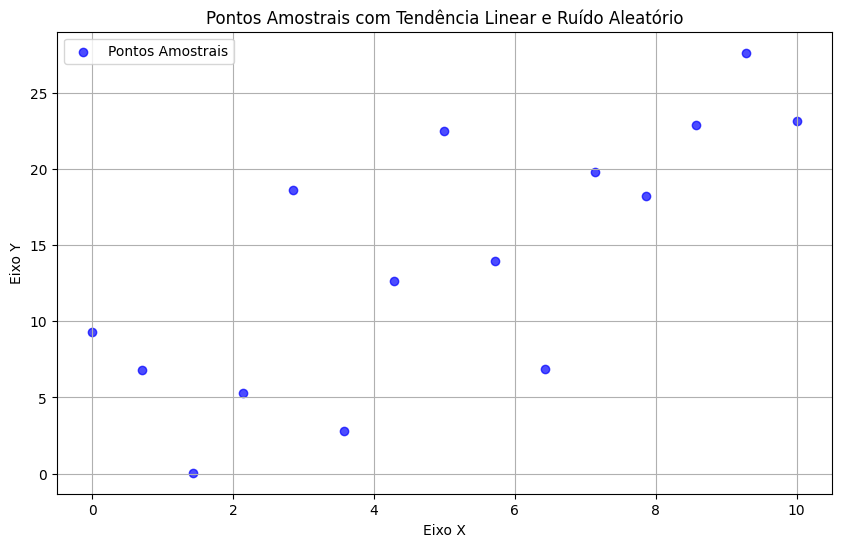

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate # Import scipy, though not directly used for point generation

# 1. Definir a quantidade de pontos
num_points = 5

# 2. Gerar pontos x
x = np.linspace(0, 10, num_points) # Pontos x igualmente espaçados de 0 a 10

# 3. Gerar pontos y com tendência linear e comportamento aleatório simples
# Definir parâmetros para a tendência linear (ex: y = 2*x + 5)
linear_slope = 2
linear_intercept = 5

# Gerar ruído aleatório
# Usar np.random.randn para ruído gaussiano centrado em zero
noise_amplitude = 5 # Ajuste para controlar a dispersão dos pontos
y_noise = np.random.randn(num_points) * noise_amplitude

# Combinar tendência linear e ruído
y = linear_slope * x + linear_intercept + y_noise

# 4. Os pontos x e y já estão armazenados em np arrays.
print(f"Primeiros 5 pontos x: {x[:5]}")
print(f"Primeiros 5 pontos y: {y[:5]}")

# 5. Fazer um plot dos pontos gerados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Pontos Amostrais', color='blue', alpha=0.7)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Pontos Amostrais com Tendência Linear e Ruído Aleatório')
plt.grid(True)
plt.legend()
plt.show()

### Interpolação Polinomial de Lagrange

A **Interpolação Polinomial de Lagrange** é um método para encontrar um único polinômio de grau $N-1$ que passa exatamente por $N$ pontos de dados distintos $(x_0, y_0), (x_1, y_1), \dots, (x_{N-1}, y_{N-1})$. A ideia principal é construir uma combinação linear de polinômios básicos, chamados **polinômios de base de Lagrange** ($L_j(x)$), onde cada polinômio de base é construído de tal forma que ele é igual a 1 em um ponto de dados $x_j$ e 0 em todos os outros pontos de dados $x_k$ (para $k \ne j$).

Essa abordagem garante que o polinômio resultante $P(x)$ passe por todos os pontos de dados fornecidos.

#### Fórmula Geral do Polinômio de Lagrange

Para um conjunto de $N$ pontos de dados $(x_0, y_0), (x_1, y_1), \dots, (x_{N-1}, y_{N-1})$, o polinômio interpolador de Lagrange de grau $N-1$ é dado por:

$$P(x) = \sum_{j=0}^{N-1} y_j L_j(x)$$

Onde $L_j(x)$ são os **polinômios de base de Lagrange**, definidos como:

$$L_j(x) = \prod_{k=0, k \ne j}^{N-1} \frac{x - x_k}{x_j - x_k}$$

**Observações sobre a Interpolação de Lagrange (1D):**

*   **Unicidade:** Para um dado conjunto de $N$ pontos distintos, existe um único polinômio de grau $N-1$ que os interpola.
*   **Grau do Polinômio:** O grau do polinômio resultante é sempre $N-1$, onde $N$ é o número de pontos.
*   **Fenômeno de Runge:** Embora seja preciso nos pontos dados, a interpolação de Lagrange pode sofrer de oscilações significativas entre os pontos (o fenômeno de Runge), especialmente quando o número de pontos $N$ é grande e os pontos $x_i$ são igualmente espaçados. Isso pode levar a resultados pouco confiáveis fora dos pontos de interpolação ou em regiões entre eles.
*   **Custo Computacional:** A adição de um novo ponto de dados requer o recálculo de todo o polinômio, o que pode ser ineficiente para grandes conjuntos de dados.

In [27]:

def lagrange_interpolation(x_points, y_points):
    """
    Calcula o polinômio interpolador de Lagrange para um dado conjunto de pontos.

    Parâmetros:
    x_points (np.array): Um array numpy com as coordenadas x dos pontos conhecidos.
    y_points (np.array): Um array numpy com as coordenadas y dos pontos conhecidos.

    Retorna:
    function: Uma função (callable) que recebe um valor x e retorna o valor interpolado.
    """
    n = len(x_points)
    if n != len(y_points):
        raise ValueError("Os arrays x_points e y_points devem ter o mesmo tamanho.")

    def P(x):
        """
        Avalia o polinômio interpolador de Lagrange em um dado ponto x.
        """
        sum_term = 0.0
        for j in range(n):
            # Calcula o j-ésimo polinômio de base de Lagrange L_j(x)
            L_j = 1.0
            for k in range(n):
                if k != j:
                    L_j *= (x - x_points[k]) / (x_points[j] - x_points[k])

            sum_term += y_points[j] * L_j
        return sum_term

    return P



# Teste da interpolação de Lagrange

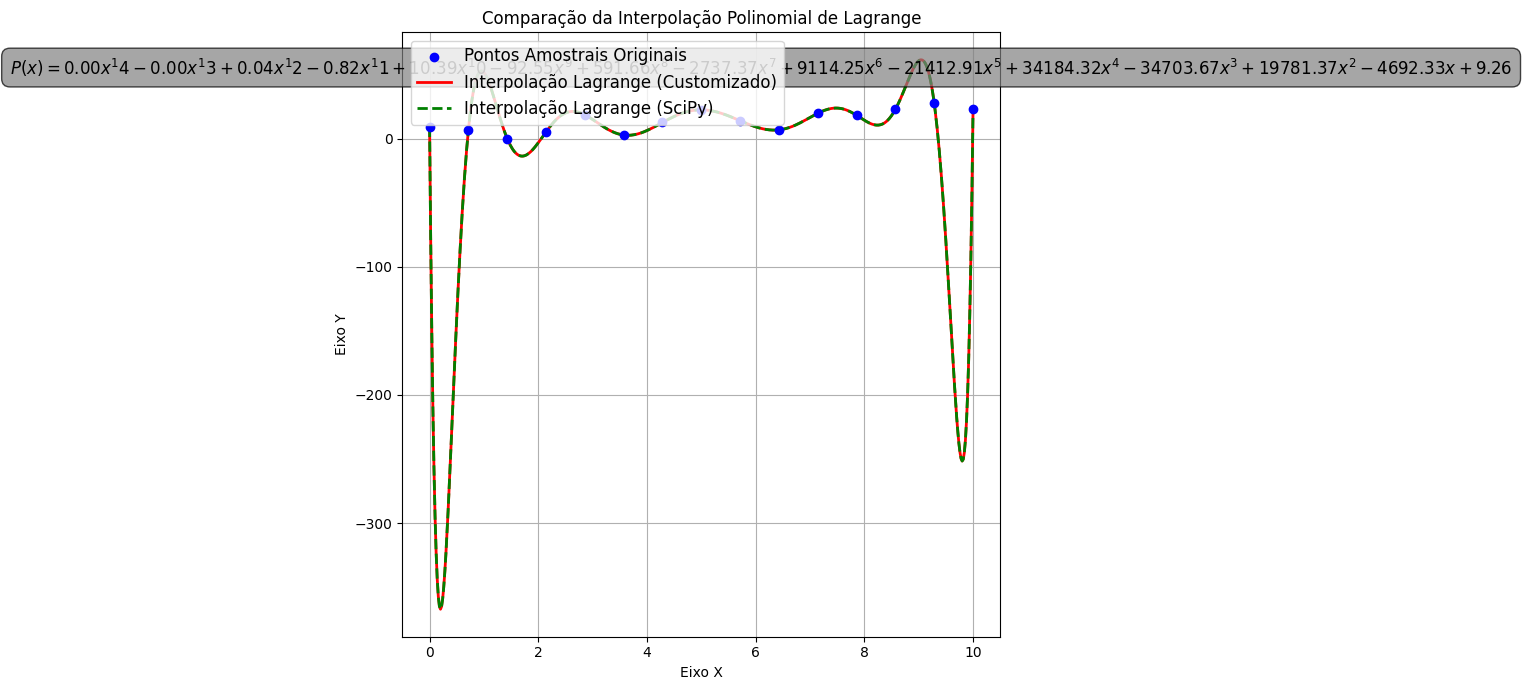

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange # Importa a função lagrange do scipy

# --- 1. Aplicar a função de interpolação Lagrangeana implementada ---
# Certifique-se de que x e y foram gerados e a função lagrange_interpolation está definida
# (Assumindo que os arrays 'x' e 'y' e a função 'lagrange_interpolation' do kernel estão disponíveis)

# Crie a função interpoladora usando a sua implementação
interpolador_lagrange_custom = lagrange_interpolation(x, y)

# --- 2. Gerar pontos para plotar as curvas interpoladas ---
# Criamos um conjunto mais denso de pontos x para uma curva suave
x_plot = np.linspace(x.min(), x.max(), 500) # 500 pontos entre o min e o max de x

# Avalie o polinômio de Lagrange personalizado nos novos pontos
y_interp_custom = [interpolador_lagrange_custom(val) for val in x_plot]

# --- 3. Comparar com uma função de interpolação Lagrangeana de biblioteca (scipy) ---
# A função lagrange do scipy retorna um objeto polinomial
polinomio_lagrange_scipy = lagrange(x, y)

# Avalie o polinômio de Lagrange do scipy nos novos pontos
y_interp_scipy = polinomio_lagrange_scipy(x_plot)

# --- 4. Plotar os resultados ---
plt.figure(figsize=(12, 7))

# Pontos amostrais originais
plt.scatter(x, y, color='blue', marker='o', label='Pontos Amostrais Originais', zorder=5)

# Interpolação Lagrangeana personalizada
plt.plot(x_plot, y_interp_custom, color='red', linestyle='-', linewidth=2, label='Interpolação Lagrange (Customizado)')

# Interpolação Lagrangeana do SciPy
plt.plot(x_plot, y_interp_scipy, color='green', linestyle='--', linewidth=2, label='Interpolação Lagrange (SciPy)')

plt.title('Comparação da Interpolação Polinomial de Lagrange')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.legend(loc='upper left', fontsize='large') # Mover a legenda para o canto superior esquerdo e aumentar a fonte

# --- Adicionar a equação do polinômio customizado ---
# O grau do polinômio é N-1, onde N é o número de pontos
poly_degree = len(x) - 1

# Usar np.polyfit para obter os coeficientes do polinômio a partir dos pontos interpolados
# np.polyfit retorna os coeficientes em ordem decrescente de potência
coefficients = np.polyfit(x_plot, y_interp_custom, poly_degree)

# Formatar os coeficientes e construir a string LaTeX da equação
equation_str = "$P(x) = "
for i, coeff in enumerate(coefficients):
    power = poly_degree - i
    sign = '+' if coeff >= 0 and i > 0 else ''
    formatted_coeff = f"{coeff:.2f}"

    if power == 0:
        equation_str += f" {sign} {formatted_coeff}"
    elif power == 1:
        equation_str += f" {sign} {formatted_coeff}x"
    else:
        equation_str += f" {sign} {formatted_coeff}x^{power}"

equation_str += "$"

# Adicionar o texto da equação ao gráfico na parte central superior com fonte maior
plt.text(0.6, 0.96, equation_str,
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='center',
         bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.7))

plt.tight_layout()
plt.show()

### Interpolação por Partes (Splines)

A **Interpolação por Partes**, ou **Spline**, é uma técnica que resolve as limitações da interpolação polinomial global (como o fenômeno de Runge) dividindo o domínio dos dados em subintervalos e ajustando um polinômio de baixo grau a cada subintervalo. Esses polinômios são então conectados nos pontos de dados (chamados de "nós") de forma a garantir um certo grau de suavidade.

#### Spline Linear

A **Spline Linear** é a forma mais simples de interpolação por partes. Em cada subintervalo entre dois pontos consecutivos $(x_i, y_i)$ e $(x_{i+1}, y_{i+1})$, um segmento de reta é traçado. Este é um polinômio de grau 1.

*   **Determinação dos Coeficientes:** Para cada subintervalo, os dois pontos adjacentes definem unicamente a reta. A equação da reta $P_i(x) = a_i x + b_i$ é determinada garantindo que $P_i(x_i) = y_i$ e $P_i(x_{i+1}) = y_{i+1}$.
*   **Suavidade:** A spline linear garante apenas continuidade da função ($C^0$ - a curva não tem "saltos"). Não há continuidade nas derivadas, resultando em "quebras" (cantos) nos nós.

#### Spline Quadrática

A **Spline Quadrática** utiliza um polinômio de grau 2 ($P_i(x) = a_i x^2 + b_i x + c_i$) para cada subintervalo. Além de garantir a continuidade da função nos nós, ela também garante a continuidade da primeira derivada.

*   **Determinação dos Coeficientes:** Para $N$ pontos de dados, teríamos $N-1$ polinômios quadráticos, cada um com 3 coeficientes, totalizando $3(N-1)$ incógnitas. As condições incluem:
    *   Continuidade da função: $P_i(x_i) = y_i$ e $P_i(x_{i+1}) = y_{i+1}$ (2 equações por intervalo).
    *   Continuidade da primeira derivada: $\frac{dP_i(x_{i+1})}{dx} = \frac{dP_{i+1}(x_{i+1})}{dx}$ (1 equação por nó interno).
    *   Normalmente, uma condição adicional é necessária (por exemplo, fixar a primeira derivada em um dos pontos extremos ou exigir continuidade da segunda derivada em um ponto) para fechar o sistema e ter uma solução única.
*   **Suavidade:** Garante continuidade da função e da primeira derivada ($C^1$). A curva é suave, mas a taxa de curvatura pode mudar abruptamente nos nós.

#### Spline Cúbica

A **Spline Cúbica** é a mais comum e amplamente utilizada. Ela usa um polinômio de grau 3 ($P_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$) em cada subintervalo. Além da continuidade da função e da primeira derivada, ela também garante a continuidade da segunda derivada.

*   **Determinação dos Coeficientes:** Para $N$ pontos, temos $N-1$ polinômios cúbicos, cada um com 4 coeficientes, totalizando $4(N-1)$ incógnitas. As condições incluem:
    *   Continuidade da função: $P_i(x_i) = y_i$ e $P_i(x_{i+1}) = y_{i+1}$ (2 equações por intervalo).
    *   Continuidade da primeira derivada: $\frac{dP_i(x_{i+1})}{dx} = \frac{dP_{i+1}(x_{i+1})}{dx}$ (1 equação por nó interno).
    *   Continuidade da segunda derivada: $\frac{d^2P_i(x_{i+1})}{dx^2} = \frac{d^2P_{i+1}(x_{i+1})}{dx^2}$ (1 equação por nó interno).
    *   Duas condições adicionais são necessárias, as mais comuns sendo:
        *   **Spline Cúbica Natural:** A segunda derivada é zero nos pontos extremos ($\frac{d^2P_0(x_0)}{dx^2} = 0$ e $\frac{d^2P_{N-2}(x_{N-1})}{dx^2} = 0$). Isso leva a uma curva que tende a ser mais reta nas extremidades.
        *   **Spline Cúbica Clamped (Fixa):** A primeira derivada é fixada nos pontos extremos (por exemplo, $\frac{dP_0(x_0)}{dx} = f'(x_0)$ e $\frac{dP_{N-2}(x_{N-1})}{dx} = f'(x_{N-1})$), se os valores das derivadas são conhecidos.
*   **Suavidade:** Garante continuidade da função, da primeira derivada e da segunda derivada ($C^2$). Isso resulta em uma curva muito suave e visualmente agradável, com curvatura contínua, evitando o problema de oscilações de polinômios de alto grau).

In [29]:


def manual_piecewise_linear_interpolation(x_points, y_points):
    """
    Cria uma função para interpolação linear por partes manual.

    Parâmetros:
    x_points (np.array): Um array numpy com as coordenadas x dos pontos conhecidos, ordenados crescentemente.
    y_points (np.array): Um array numpy com as coordenadas y dos pontos conhecidos.

    Retorna:
    function: Uma função (callable) que recebe um valor x e retorna o valor interpolado.
    """
    n = len(x_points)
    if n != len(y_points):
        raise ValueError("Os arrays x_points e y_points devem ter o mesmo tamanho.")
    if not np.all(np.diff(x_points) > 0):
        raise ValueError("x_points deve ser estritamente crescente.")

    def P_linear(x_val):
        """
        Avalia a interpolação linear por partes em um dado ponto x_val.
        """
        # 4. Checar se x_val está fora do range
        if x_val < x_points[0] or x_val > x_points[-1]:
            return np.nan

        # 5. Encontrar o índice do segmento
        # np.searchsorted retorna o índice onde x_val seria inserido para manter a ordem.
        # Se x_val for igual a um x_point, retorna o índice desse x_point.
        # Para interpolação linear, precisamos do segmento [x_i, x_{i+1}].
        # Se x_val é x_points[k], então idx será k. O segmento é (k-1, k).
        # Se x_val está entre x_points[k-1] e x_points[k], então idx será k.
        idx = np.searchsorted(x_points, x_val)

        # Se x_val é um dos pontos dados, retornar y_points[idx]
        if idx < n and x_points[idx] == x_val:
            return y_points[idx]

        # O segmento relevante está entre x_points[idx-1] e x_points[idx].
        # Ajuste para garantir que 'i' seja o índice do ponto inicial do segmento.
        i = idx - 1

        # 6. Aplicar a fórmula de interpolação linear
        # Certifique-se de que i e i+1 estão dentro dos limites para evitar IndexError
        if i < 0 or i >= n - 1:
            # Isso não deve acontecer se as verificações de limite (x_val < x_points[0] or x_val > x_points[-1])
            # e a verificação de pontos exatos estiverem corretas.
            return np.nan # Ou raise an error, dependendo do comportamento desejado para edge cases

        x0, y0 = x_points[i], y_points[i]
        x1, y1 = x_points[i+1], y_points[i+1]

        # Evitar divisão por zero caso x_points[i+1] == x_points[i] (o que já é verificado por np.all(np.diff(x_points) > 0))
        if x1 == x0:
            return y0 # Ou um erro, se x_points deveriam ser estritamente distintos.

        y_interp = y0 + (y1 - y0) * (x_val - x0) / (x1 - x0)
        return y_interp

    # 8. Retornar a função aninhada
    return P_linear


In [30]:
import numpy as np

def manual_piecewise_quadratic_interpolation(x_points, y_points):
    """
    Cria uma função para interpolação quadrática por partes (spline natural).

    A spline quadrática natural é definida pela condição de que a segunda
    derivada no primeiro ponto é zero (P_0''(x_0) = 0).

    Parâmetros:
    x_points (np.array): Um array numpy com as coordenadas x dos pontos conhecidos, ordenados crescentemente.
    y_points (np.array): Um array numpy com as coordenadas y dos pontos conhecidos.

    Retorna:
    function: Uma função (callable) que recebe um valor x e retorna o valor interpolado.
    """
    n = len(x_points)
    if n != len(y_points):
        raise ValueError("Os arrays x_points e y_points devem ter o mesmo tamanho.")
    if n < 2:
        raise ValueError("Pelo menos 2 pontos são necessários para interpolação.")
    if not np.all(np.diff(x_points) > 0):
        raise ValueError("x_points deve ser estritamente crescente.")

    # 1. Calcular as diferenças h_i
    h = np.diff(x_points)

    # 2. Calcular as primeiras derivadas (slopes) s_i nos nós
    # s_i representa a primeira derivada do polinômio P_i(x) no ponto x_i.
    # Para N pontos, temos N derivadas s_0, ..., s_{N-1}
    s = np.zeros(n)

    # Condição de contorno para spline quadrática "natural": P_0''(x_0) = 0.
    # Se P_i(x) = a_i(x - x_i)^2 + b_i(x - x_i) + c_i, então P_i''(x) = 2*a_i.
    # P_0''(x_0) = 2*a_0 = 0 => a_0 = 0.
    # Se a_0 = 0, P_0(x) é linear. A derivada de P_0(x) é constante, então P_0'(x_0) = P_0'(x_1).
    # P_0'(x_0) = b_0.
    # P_0'(x_1) = b_1 (para o segmento seguinte). A continuidade exige b_0 = b_1.
    # Usando a relação b_{i+1} = 2*(y_{i+1} - y_i)/h_i - b_i para i=0:
    # b_1 = 2*(y_1 - y_0)/h_0 - b_0.
    # Com b_0 = b_1, temos b_0 = 2*(y_1 - y_0)/h_0 - b_0 => 2*b_0 = 2*(y_1 - y_0)/h_0
    # b_0 = (y_1 - y_0)/h_0
    s[0] = (y_points[1] - y_points[0]) / h[0]

    # Calcular s_i restantes usando a relação de recorrência: s_{i+1} = 2 * (y_{i+1} - y_i) / h_i - s_i
    # Para i = 0 até N-2
    for i in range(n - 1):
        # s[i] é b_i
        # y_points[i] é y_i
        # h[i] é h_i
        # s[i+1] é b_{i+1}
        if i < n - 1:
            s[i+1] = 2 * (y_points[i+1] - y_points[i]) / h[i] - s[i]

    # 3. Calcular os coeficientes a_i, b_i, c_i para cada polinômio P_i(x) = a_i (x - x_i)^2 + b_i (x - x_i) + c_i
    # para cada intervalo [x_i, x_{i+1}]. Teremos N-1 polinômios.
    coeffs = [] # Lista para armazenar {'a': a_i, 'b': b_i, 'c': c_i, 'x_i': x_points[i]} de cada segmento
    for i in range(n - 1):
        # c_i = P_i(x_i) = y_i
        ci = y_points[i]

        # b_i = P_i'(x_i) = s_i
        bi = s[i]

        # a_i é encontrado usando P_i(x_{i+1}) = y_{i+1}:
        # a_i(x_{i+1} - x_i)^2 + b_i(x_{i+1} - x_i) + c_i = y_{i+1}
        # a_i h_i^2 + bi h_i + ci = y_{i+1}
        # a_i = (y_{i+1} - y_i - bi h_i) / h_i^2
        ai = (y_points[i+1] - y_points[i] - bi * h[i]) / h[i]**2

        coeffs.append({'a': ai, 'b': bi, 'c': ci, 'x_i': x_points[i]})

    def P_quadratic(x_val):
        """
        Avalia a interpolação quadrática por partes em um dado ponto x_val.
        """
        if x_val < x_points[0] or x_val > x_points[-1]:
            return np.nan

        # Encontrar o índice do segmento [x_i, x_{i+1}]
        idx = np.searchsorted(x_points, x_val)

        # Se x_val é exatamente um ponto conhecido, retornar seu y correspondente
        if idx < n and x_points[idx] == x_val:
            return y_points[idx]

        # O segmento relevante é o 'i'-ésimo segmento, onde i = idx - 1.
        i = idx - 1

        # Pega os coeficientes para o segmento 'i'
        segment_coeffs = coeffs[i]
        a = segment_coeffs['a']
        b = segment_coeffs['b']
        c = segment_coeffs['c']
        xi = segment_coeffs['x_i']

        # Avalia o polinômio quadrático para o x_val usando a base (x - x_i)
        dx = x_val - xi
        y_interp = a * dx**2 + b * dx + c
        return y_interp

    return P_quadratic


In [31]:
import numpy as np

def manual_piecewise_cubic_interpolation(x_points, y_points):
    """
    Cria uma função para interpolação cúbica por partes (spline cúbica natural).

    A spline cúbica natural é definida pela condição de que a segunda
    derivada nos pontos extremos é zero (M_0 = 0 e M_{N-1} = 0).

    Parâmetros:
    x_points (np.array): Um array numpy com as coordenadas x dos pontos conhecidos, ordenados crescentemente.
    y_points (np.array): Um array numpy com as coordenadas y dos pontos conhecidos.

    Retorna:
    function: Uma função (callable) que recebe um valor x e retorna o valor interpolado.
    """
    n = len(x_points)
    if n != len(y_points):
        raise ValueError("Os arrays x_points e y_points devem ter o mesmo tamanho.")
    if n < 2:
        raise ValueError("Pelo menos 2 pontos são necessários para interpolação.")
    if not np.all(np.diff(x_points) > 0):
        raise ValueError("x_points deve ser estritamente crescente.")

    # 1. Calcular as diferenças h_i
    h = np.diff(x_points)

    # 2. Montar e resolver o sistema tridiagonal para as segundas derivadas M_i
    # O sistema é AM = B, onde A é a matriz tridiagonal, M são as segundas derivadas
    # e B é o lado direito das equações.

    # A matriz A tem (N-2)x(N-2) para M_1 a M_{N-2} (já que M_0 = M_{N-1} = 0)
    # Então, N-2 equações para N-2 incógnitas.
    # No entanto, vamos construir o sistema para todos os M_i e aplicar as condições de contorno.

    # Para N pontos (x_0, ..., x_{N-1}), temos N segundos derivadas M_0, ..., M_{N-1}.
    # Equações de continuidade da segunda derivada:
    # h_{i-1}*M_{i-1} + 2*(h_{i-1}+h_i)*M_i + h_i*M_{i+1} = 6*((y_{i+1}-y_i)/h_i - (y_i-y_{i-1})/h_{i-1})
    # para i = 1, ..., N-2

    # Inicializa a matriz A e o vetor B para o sistema linear.
    # Temos N incógnitas (M_0 a M_{N-1}), mas 2 já são conhecidas (M_0=0, M_{N-1}=0).
    # Então, precisamos resolver um sistema para M_1 a M_{N-2}, que são N-2 incógnitas.

    # Criar a matriz tridiagonal A de tamanho (N-2) x (N-2)
    A = np.zeros((n - 2, n - 2))
    # Criar o vetor B de tamanho (N-2)
    B = np.zeros(n - 2)

    for i in range(1, n - 1):
        # Para i=1 (primeira equação):
        # 2*(h_0+h_1)*M_1 + h_1*M_2 = 6*((y_2-y_1)/h_1 - (y_1-y_0)/h_0) - h_0*M_0
        # Como M_0 = 0, o último termo é 0.

        # Para i=N-2 (última equação):
        # h_{N-3}*M_{N-3} + 2*(h_{N-3}+h_{N-2})*M_{N-2} = 6*((y_{N-1}-y_{N-2})/h_{N-2} - (y_{N-2}-y_{N-3})/h_{N-3}) - h_{N-2}*M_{N-1}
        # Como M_{N-1} = 0, o último termo é 0.

        # Diagonal principal
        A[i-1, i-1] = 2 * (h[i-1] + h[i])
        # Diagonal superior
        if i < n - 2:
            A[i-1, i] = h[i]
        # Diagonal inferior
        if i > 1:
            A[i-1, i-2] = h[i-1]

        B[i-1] = 6 * ((y_points[i+1] - y_points[i]) / h[i] - (y_points[i] - y_points[i-1]) / h[i-1])

    # Resolver o sistema linear para M_1 a M_{N-2}
    M_internal = np.linalg.solve(A, B)

    # Montar o vetor completo das segundas derivadas M
    M = np.zeros(n)
    M[0] = 0.0 # Condição de contorno natural
    M[n-1] = 0.0 # Condição de contorno natural
    M[1:n-1] = M_internal

    # 3. Calcular os coeficientes a_i, b_i, c_i, d_i para cada polinômio cúbico
    # P_i(x) = a_i (x - x_i)^3 + b_i (x - x_i)^2 + c_i (x - x_i) + d_i
    # para o intervalo [x_i, x_{i+1}]

    # Temos N-1 segmentos, de i=0 a N-2.
    coeffs = [] # Lista para armazenar (a, b, c, d) de cada segmento
    for i in range(n - 1):
        d_i = y_points[i]
        c_i = (y_points[i+1] - y_points[i]) / h[i] - (h[i] / 6) * (2 * M[i] + M[i+1])
        b_i = M[i] / 2
        a_i = (M[i+1] - M[i]) / (6 * h[i])
        coeffs.append({'a': a_i, 'b': b_i, 'c': c_i, 'd': d_i, 'x_i': x_points[i]})

    def P_cubic(x_val):
        """
        Avalia a interpolação cúbica por partes em um dado ponto x_val.
        """
        # a. Verifique se x_val está fora do domínio
        if x_val < x_points[0] or x_val > x_points[-1]:
            return np.nan

        # b. Use np.searchsorted para encontrar o índice do intervalo
        # Se x_val está entre x_points[i] e x_points[i+1], idx será i+1.
        idx = np.searchsorted(x_points, x_val)

        # c. Se x_val é exatamente um x_point
        if idx < n and x_points[idx] == x_val:
            return y_points[idx]

        # Ajustar o índice para o segmento correto (0 a N-2)
        # Se x_val estiver no primeiro segmento (x_0 a x_1), idx será 1, então i = 0.
        # Se x_val estiver no último segmento (x_{N-2} a x_{N-1}), idx será N-1, então i = N-2.
        i = idx - 1

        # d. Aplicar os coeficientes do intervalo i para calcular P_i(x_val)
        segment_coeffs = coeffs[i]
        a = segment_coeffs['a']
        b = segment_coeffs['b']
        c = segment_coeffs['c']
        d = segment_coeffs['d']
        xi = segment_coeffs['x_i']

        dx = x_val - xi
        y_interp = a * dx**3 + b * dx**2 + c * dx + d
        return y_interp

    # 9. Retornar a função aninhada
    return P_cubic



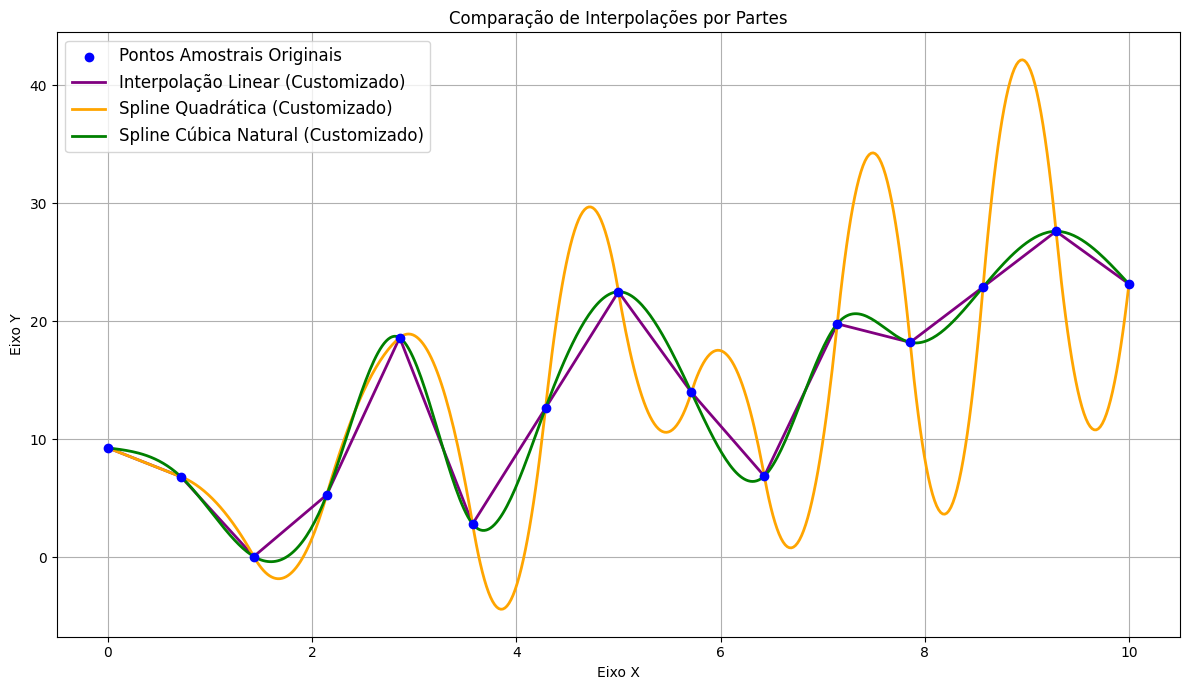

In [32]:
import matplotlib.pyplot as plt

# 1. Gerar um conjunto denso de pontos x_plot
x_plot = np.linspace(x.min(), x.max(), 500) # 500 pontos entre o min e o max de x

# 2. Crie uma função interpoladora linear e a avalie
interpolador_linear_custom = manual_piecewise_linear_interpolation(x, y)
y_interp_linear_custom = [interpolador_linear_custom(val) for val in x_plot]

# 3. Crie uma função interpoladora quadrática e a avalie
interpolador_quadratico_custom = manual_piecewise_quadratic_interpolation(x, y)
y_interp_quadratico_custom = [interpolador_quadratico_custom(val) for val in x_plot]

# 4. Crie uma função interpoladora cúbica e a avalie
interpolador_cubico_custom = manual_piecewise_cubic_interpolation(x, y)
y_interp_cubico_custom = [interpolador_cubico_custom(val) for val in x_plot]

# 5. Crie um novo gráfico matplotlib
plt.figure(figsize=(12, 7))

# 6. Plote os pontos amostrais originais
plt.scatter(x, y, color='blue', marker='o', label='Pontos Amostrais Originais', zorder=5)

# 7. Plote a curva interpolada linear
plt.plot(x_plot, y_interp_linear_custom, color='purple', linestyle='-', linewidth=2, label='Interpolação Linear (Customizado)')

# 8. Plote a curva interpolada quadrática
plt.plot(x_plot, y_interp_quadratico_custom, color='orange', linestyle='-', linewidth=2, label='Spline Quadrática (Customizado)')

# 9. Plote a curva interpolada cúbica
plt.plot(x_plot, y_interp_cubico_custom, color='green', linestyle='-', linewidth=2, label='Spline Cúbica Natural (Customizado)')

# 10. Adicione título, rótulos, grade e legenda
plt.title('Comparação de Interpolações por Partes')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)
plt.legend(loc='upper left', fontsize='large')

# 11. Ajuste o layout e exiba o gráfico
plt.tight_layout()
plt.show()
